In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *
import random

In [6]:
def makePopulation(N,popSize):
    population=list()
    for p in range(popSize):
        genome=list()
        for n in range(N):
            genome.append(random.randint(0,1))
        population.append(genome)
    return population

print makePopulation(5,10)

[[1, 1, 1, 1, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 1], [1, 1, 0, 1, 0], [1, 1, 1, 0, 0], [1, 1, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 1, 1], [0, 0, 0, 0, 1], [1, 1, 0, 1, 1]]


In [9]:
def computeFitness(genome):
    fitness=0
    for i in range(len(genome)):
        fitness=fitness+genome[i]
        
    return fitness

computeFitness([0,1,0,1,1,1,0,1,0])

5

In [10]:
def makeMutant(genome,mutationRate):
    newGenome=list()
    for i in range(len(genome)):
        if random.uniform(0.0,1.0)<mutationRate:
            newGenome.append(1-genome[i])
        else:
            newGenome.append(genome[i])
    return newGenome

random.seed(0)

for i in range(10):
    print makeMutant([0,0,0,0,0],0.3)

[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 1, 0]
[0, 1, 0, 1, 0]


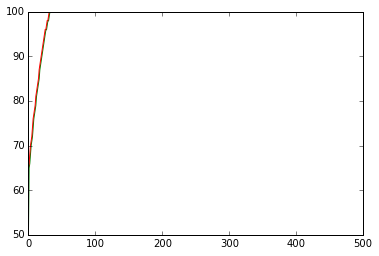

In [24]:
#create a population
N=100
popSize=1000
population=makePopulation(N,popSize)
generations=500
mutationRate=0.001
#print population
meanW=list()
maxW=list()
    
for generation in range(generations):
    W=list()
    for i in range(len(population)):
        W.append(computeFitness(population[i]))
    
    
    nextGeneration=list()
    meanW.append(mean(W))
    highestFitness=max(W)
    maxW.append(highestFitness)
    
    while len(nextGeneration)<popSize:
        who=random.randint(0,popSize-1)
        while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
            who=random.randint(0,popSize-1)
        nextGeneration.append(makeMutant(population[who],mutationRate))
    population=list(nextGeneration)

#print population
plot(meanW,'g')
plot(maxW,'r')

In [52]:
def SumFitnessSimulation(N,popSize):

    population=makePopulation(N,popSize)
    generations=500
    mutationRate=0.001
    meanW=list()
    maxW=list()
    GensToMax=0

    for generation in range(generations):
        W=list()
        for i in range(len(population)):
            W.append(computeFitness(population[i]))

        nextGeneration=list()
        meanW.append(float(mean(W))/float(N))
        highestFitness=(max(W))
        maxW.append(float(highestFitness)/float(N))

        while len(nextGeneration)<popSize:
            who=random.randint(0,popSize-1)
            while (random.uniform(0.0,1.0)>(W[who]/highestFitness)):
                who=random.randint(0,popSize-1)
            nextGeneration.append(makeMutant(population[who],mutationRate))
        population=list(nextGeneration)
        if highestFitness!=N:
            GensToMax=GensToMax+1
    return (GensToMax)


N=10
popSize=100
print SumFitnessSimulation(N,popSize)


26


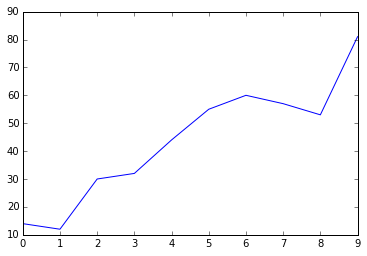

In [53]:
L=list()
n=10
while (n<110):
    L.append(n)
    n=n+10
popSize=100
GensToMaxL=list()
for l in L:
    GensToMaxL.append(SumFitnessSimulation(l,popSize))

plot(GensToMaxL)
    

In [60]:
def AverageSumFitSim(TotalRuns,N,popSize):
    GenSum=0
    for i in range(TotalRuns):
        GenSum=GenSum+(SumFitnessSimulation(N,popSize))
    return (float(GenSum)/float(TotalRuns))
print AverageSumFitSim(5,10,100)

10.2


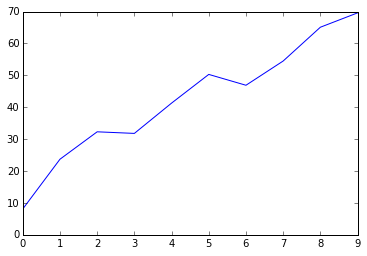

In [62]:
popSize=100
TotalRuns=10
L=list()
n=10
while (n<110):
    L.append(n)
    n=n+10
G=list()
for l in L:
    G.append(AverageSumFitSim(TotalRuns,l,popSize))
    
plot(G)

# As N increases, average time to max fitness also increases